INTRODUÇÃO:


Será explorados dados do arquivo obesity.csv, disponibilizado pelo www.kaggle.com, a base de dados pode ser acessado através deste link: https://www.kaggle.com/datasets/muhramasaputra/obesity-based-on-eating-habits-and-physical-cond.
Os dados estão em formato CSV e contém informações sobre o número de obesidade com base em hábitos alimentares e condição física, estamos interessado em explicar a última coluna "Nobeyesdad" quê indica que pessoas com (NObeyesdad = 0) seja pessoas não obesa e (NObeyesdad = 1) pessoas obesas ou seja queremos entender o motivo ao qual leva as pessoas terem obesidade baseado nos seus atos alimentares, atividades fisicas e etc.

Descrição do dados logo abaixo: 

    O gênero é 1 se o entrevistado for do sexo masculino e 0 se o entrevistado for do sexo feminino.
    Idade é a idade do entrevistado em anos.
    family_history_with_overweight é 1 se um entrevistado tem um membro da família que está ou estava acima do peso, 0 se não.
    FAVC é 1 se um entrevistado come alimentos com alto teor calórico com frequência, 0 se não.
    O FCVC é 1 se o entrevistado costuma comer vegetais nas refeições, 0 caso contrário.
    O NCP representa quantas refeições principais um entrevistado faz diariamente (0 para 1-2 refeições, 1 para 3 refeições e 2 para mais de 3 refeições).
    CAEC representa a quantidade de comida que um entrevistado ingere entre as refeições em uma escala de 0 a 3.
    SMOKE é 1 se o entrevistado fuma, 0 se não.
    CH2O representa quanta água um entrevistado bebe em uma escala de 0 a 2.
    O SCC é 1 se um entrevistado monitora sua ingestão calórica, 0 caso contrário.
    FAF representa quanta atividade física um entrevistado faz em uma escala de 0 a 3.
    TUE representa quanto tempo um entrevistado passa olhando para dispositivos com telas em uma escala de 0 a 2.
    CALC representa a frequência com que um entrevistado bebe álcool em uma escala de 0 a 3.
    Automóvel , Bicicleta , Moto , Transporte Público e Caminhada indicam o principal meio de transporte do entrevistado. Seu principal meio de transporte é indicado por 1 e as outras colunas conterão 0.
    NObeyesdad é 1 se o paciente for obeso e 0 se não for.

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [2]:
df_obesidade = pd.read_csv(r'C:\Users\gabri\OneDrive\Documentos\Python Scripts\Projeto_consulta_basededados_obesidade\obesity_dados_antes_da_consulta.csv')

In [3]:
df_obesidade

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


In [4]:
df_obesidade.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,2111.0,0.505921,0.500083,0.0,0.000000,1.000000,1.000000,1.0
Age,2111.0,24.312600,6.345968,14.0,19.947192,22.777890,26.000000,61.0
family_history_with_overweight,2111.0,0.817622,0.386247,0.0,1.000000,1.000000,1.000000,1.0
FAVC,2111.0,0.883941,0.320371,0.0,1.000000,1.000000,1.000000,1.0
FCVC,2111.0,2.419043,0.533927,1.0,2.000000,2.385502,3.000000,3.0
NCP,2111.0,2.685628,0.778039,1.0,2.658738,3.000000,3.000000,4.0
CAEC,2111.0,1.140692,0.468543,0.0,1.000000,1.000000,1.000000,3.0
SMOKE,2111.0,0.020843,0.142893,0.0,0.000000,0.000000,0.000000,1.0
CH2O,2111.0,2.008011,0.612953,1.0,1.584812,2.000000,2.477420,3.0
SCC,2111.0,0.045476,0.208395,0.0,0.000000,0.000000,0.000000,1.0


In [5]:
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [6]:
df_obesidade.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

In [7]:
df_obesidade.nunique()

Gender                               2
Age                               1402
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
Automobile                           2
Bike                                 2
Motorbike                            2
Public_Transportation                2
Walking                              2
NObeyesdad                           2
dtype: int64

In [8]:
df_obesidade.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [9]:
media_refeicao = df_obesidade['NCP'].mean()
df_obesidade['NCP'] = df_obesidade['NCP'].replace(4, media_refeicao)

'''passando valores para o modelo de treino e teste, valores_x recebe a minha primeira coluna até a penultima
modelo valores_y recebe a última coluna NObeyesdad a qual iremos usar como classificação.'''
valores_x = df_obesidade.iloc[:,:-1].values
valores_y = df_obesidade.iloc[:, 18].values

'''dividindo os dados em treinamente e teste, passando  40% dos meus dados como treinamento'''
valores_x_train , valores_x_teste , valores_y_train , valores_y_teste =  train_test_split(
    valores_x, valores_y, train_size=0.40, random_state=42
    )

'''dicionário com 3 classes para saber qual é o melhor para se usar no meu dataset'''

modelos = {'KNN': KNeighborsClassifier(),
           'RandomForest':RandomForestClassifier(),
           'LogisticRegression':LogisticRegression()}

'''função que recebe os valores_y e valores_x, faz o treinamento do meu dados e retorna a avalição de cada classe'''
def treinar_and_avaliar(modelos, x_train, x_teste,y_train, y_teste):
    avaliação_de_modelo = {}
    for estancia, objeto in modelos.items():
        objeto.fit(x_train, y_train)
        avaliação_de_modelo[estancia] = objeto.score(x_teste, y_teste)
    return avaliação_de_modelo

print(treinar_and_avaliar(modelos=modelos, x_train=valores_x_train, x_teste=valores_x_teste,
                    y_train=valores_y_train, y_teste=valores_y_teste))

'''OBS: Bom antes de passar alguns parametrôs presente neste código, eu tinha rodado ele, mas observei que o meu modelo
estava decorando (overfitting) ao invés de aprender então, refiz o código passando alguns parametros para prevenir overfitting'''

'''com o resultado da avaliação em mãos o modelo que teve a melhor avaliação foi o RandomForest então iremos usa-lo,
a variavel "classificação" ela recebe a classificação do meu modelo randomforest, com um número de estimação(arvore) de 140, max_depth 
para prevenir overfitting forçando cada arvore a tomar decisões generelizada ao invés de decorar, min_samples_split e min_samples_leaf
isso impede a criação de folhas que representem muito poucos dados, o que poderia introduzir ruido nas previsões
'''
escala_1 = StandardScaler()
valores_x_train = escala_1.fit_transform(valores_x_train)
valores_x_teste = escala_1.transform(valores_x_teste)

classificação = RandomForestClassifier(n_estimators=140, max_depth=10, min_samples_split=5,
                                min_samples_leaf=2)

'''avaliação do meu modelo'''
scores = cross_val_score(classificação, valores_x_train, valores_y_train, cv=5)
print("Validação cruzada: ", scores)
print('Média da validação cruzada', scores.mean())

#parte de treinamento do modelo
classificação.fit(valores_x_train, valores_y_train)

'''previsões e avaliando o conjunto de treinamento pra ter uma avalição se meu modelo está decorando ou generalizando'''
y_treinamento_pred = classificação.predict(valores_x_train)
matrix_treinamento = confusion_matrix(valores_y_train, y_treinamento_pred)
report_treinamento = classification_report(valores_y_train, y_treinamento_pred)


print(matrix_treinamento)
print('Relatório do meu conjunto de treinamento')
print(report_treinamento)

'''previsões e avaliando o meu conjunto de teste para fazer uma comparação com meu modelo de treinamento'''
y_predict = classificação.predict(valores_x_teste)
matrix_teste = confusion_matrix(valores_y_teste, y_predict)
report_teste = classification_report(valores_y_teste, y_predict)

print(matrix_teste)
print('Relatório do meu conjunto de teste')
print(report_teste)

c:\Users\gabri\anaconda3\envs\envpower\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.819258089976322, 'RandomForest': 0.9155485398579322, 'LogisticRegression': 0.7569060773480663}
Validação cruzada:  [0.88757396 0.87573964 0.91715976 0.89349112 0.875     ]
Média da validação cruzada 0.889792899408284
[[436  11]
 [ 11 386]]
Relatório do meu conjunto de treinamento
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       447
           1       0.97      0.97      0.97       397

    accuracy                           0.97       844
   macro avg       0.97      0.97      0.97       844
weighted avg       0.97      0.97      0.97       844

[[623  69]
 [ 67 508]]
Relatório do meu conjunto de teste
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       692
           1       0.88      0.88      0.88       575

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      126

Text(61.5, 0.5, 'Rotulos previsto')

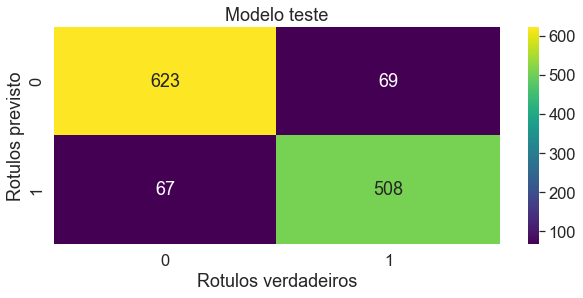

In [10]:
'''Gráfio relatório do meu conjunto de teste'''
sns.set(font_scale=1.5) 
fig , ax = plt.subplots(figsize=(10,4))
ax = sns.heatmap(confusion_matrix(valores_y_teste, y_predict), annot=True, cbar=True, fmt='d', cmap='viridis')
ax.set_title('Modelo teste')
ax.set_xlabel('Rotulos verdadeiros')
ax.set_ylabel('Rotulos previsto')